In [42]:
import pandas as pd
import numpy as np

In [55]:
#converting txt to csv
read_file = pd.read_csv('HURDAT2.txt')
read_file.to_csv('HURDAT2.csv')
df = read_file.iloc[:,:-1]
df.columns=["Date","Time","Event","Status","Latitude","Longitude","Maximum Wind","Minimum Pressure","Low Wind NE","Low Wind SE","Low Wind SW","Low Wind NW","Moderate Wind NE","Moderate Wind SE","Moderate Wind SW","Moderate Wind NW","High Wind NE","High Wind SE","High Wind SW","High Wind NW"]
df = df.dropna(axis=0)
df = df[df.iloc[:,10]!=-999]
#df.head()

C:\Users\qxh3161\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [51]:
status = pd.unique(df.iloc[:,3])
print(status)

[' TD' ' TS' ' HU' ' EX' ' WV' ' LO' ' SS' ' SD' ' DB']


In [61]:
# replacing status to numeric value
for i in range(len(status)):
    df['Status'].replace(status[i], i, inplace=True)
    
# remoivng North and West
df['Latitude'] = df.iloc[:,4].str.replace('[a-zA-Z]','')
df['Longitude'] = df.iloc[:,5].str.replace('[a-zA-Z]','')

df.head()

,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
45160,20040731,1800,,0,30.3,78.3,25.0,1010.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45161,20040801,0000,,0,31.0,78.8,25.0,1009.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45162,20040801,0600,,0,31.5,79.0,25.0,1009.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45163,20040801,1200,,0,31.6,79.1,30.0,1009.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45164,20040801,1800,,1,31.6,79.2,35.0,1009.0,0.0,50.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
def is_real_and_finite(x):
    if not np.isreal(x):
        return False
    elif not np.isfinite(x):
        return False
    else:
        return True

all_data = df[df.columns[3:]].values #dropping first 3 columns
numeric_map = df[df.columns[1:]].applymap(is_real_and_finite)
X = np.array(all_data)
print(X.shape)

(9101, 17)


In [65]:
x_string = [str(name) for name in df.columns[3:20]]
print(x_string)

['Status', 'Latitude', 'Longitude', 'Maximum Wind', 'Minimum Pressure', 'Low Wind NE', 'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE', 'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW', 'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW']


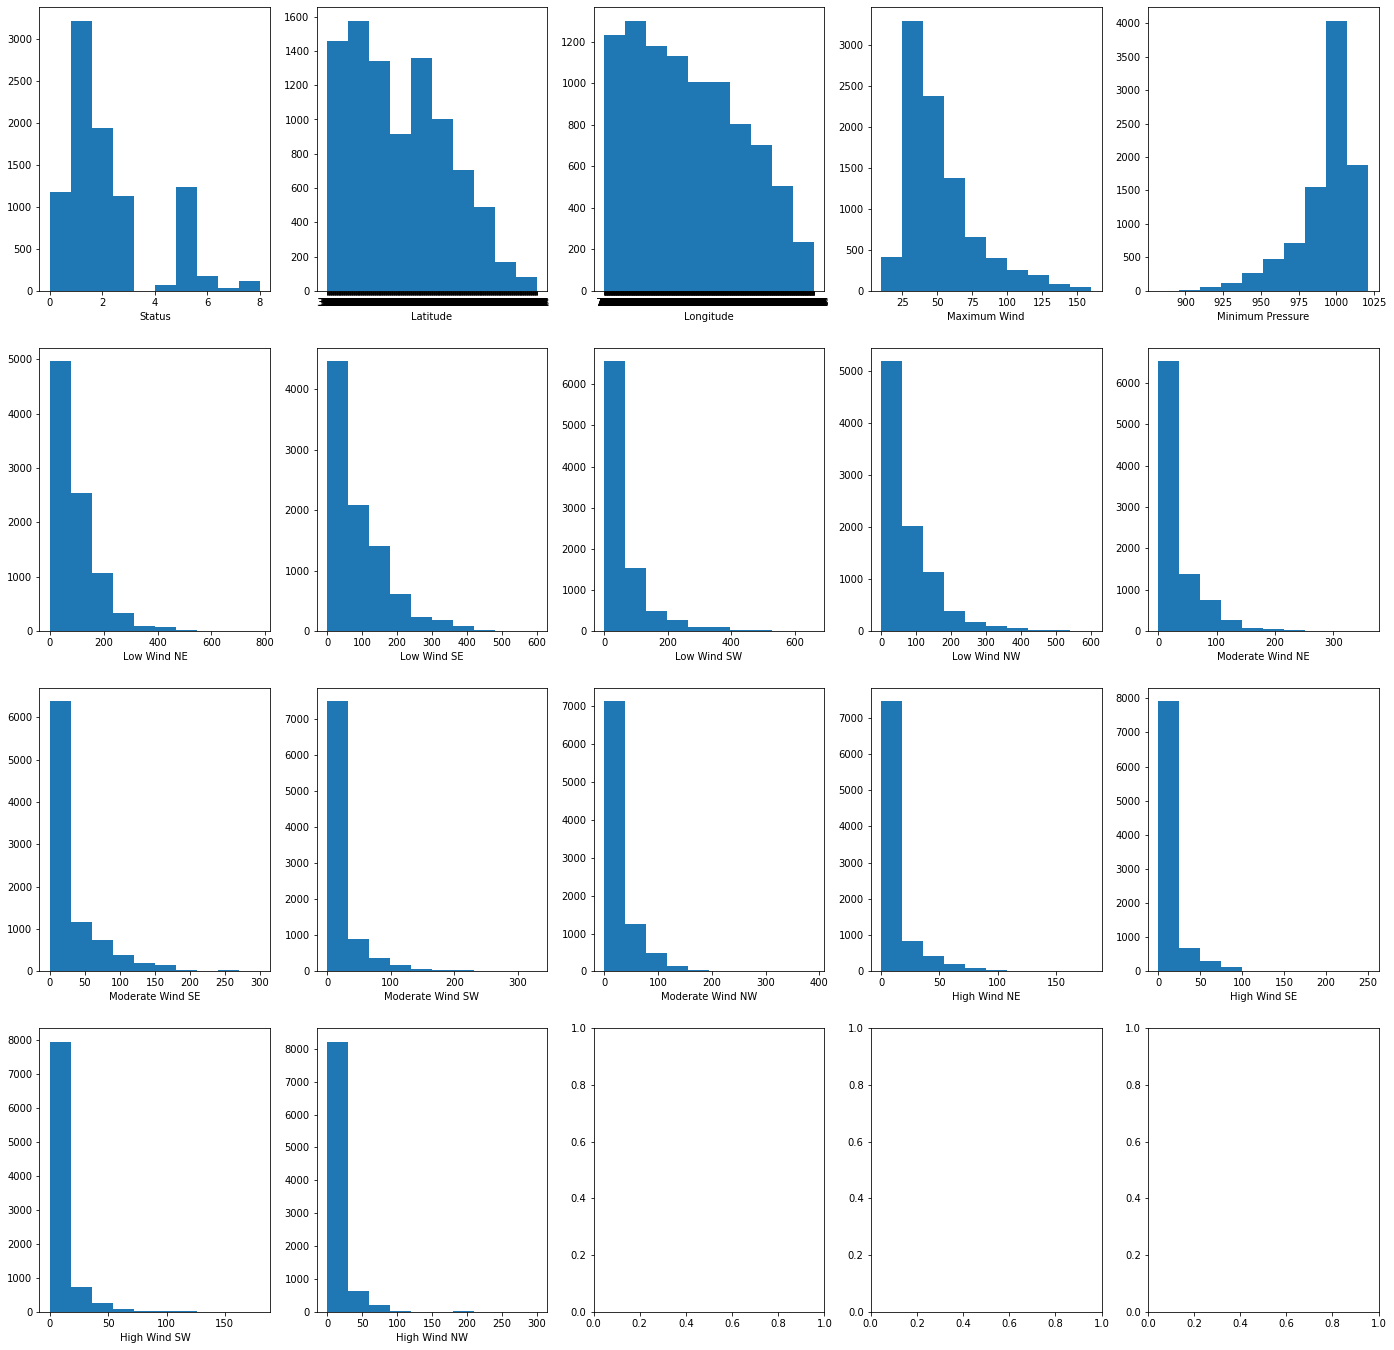

In [66]:
#visualizing of features
import matplotlib.pyplot as plt

N = X.shape[-1]
n = int(np.sqrt(N))
fig, axes = plt.subplots(n, n+1, figsize=(6*n, 6*n))
ax = axes.ravel()
for i in range(N):
    ax[i].hist(X[:,i])
    ax[i].set_xlabel(x_string[i])

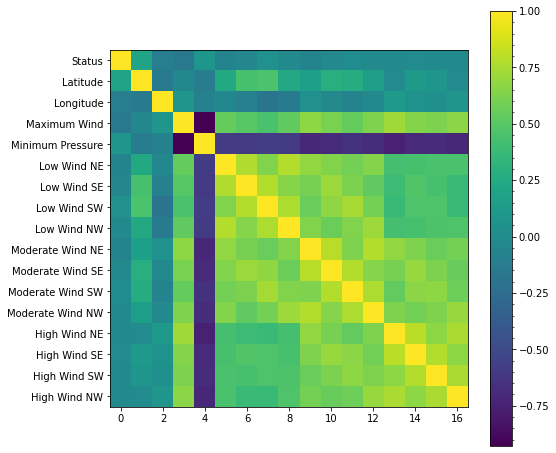

In [67]:
#check correlation numerical features

X = X.astype(np.float)
X_scaled = (X-X.mean(axis=0))/X.std(axis=0)
co_var = np.cov(X_scaled.T)

fig, ax = plt.subplots(figsize=(8,8))
ax.set_yticks(np.arange(len(x_string)))
ax.set_yticklabels(x_string)
c = ax.imshow(co_var)
cbar = fig.colorbar(c)
cbar.minorticks_on();

Most of the features are positively correlated. The first three features are not correlated to other features.

In [71]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

X = StandardScaler().fit_transform(X)
pca = PCA(n_components=10)
pc = pca.fit_transform(X)

[0.53592152 0.11694576 0.06664768 0.05367803 0.04409361 0.03411467
 0.02770622 0.02626892 0.02205217 0.01710603]


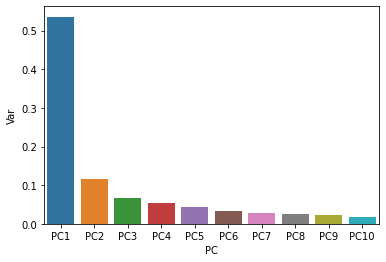

In [72]:
pc_df = pd.DataFrame(data = pc)
print(pca.explained_variance_ratio_)
df = pd.DataFrame({'Var':pca.explained_variance_ratio_, 'PC':['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']})

sns.barplot(x='PC', y='Var', data=df)

### PCA analysis so far
- PC explains more than 50% of the variance in the data

In [76]:
#number of components to capture 0.9 variance

pca = PCA(0.9)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

print('number of PCA to keep:',pca.n_components_)

number of PCA to keep: 8
